In [1]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall/254 # 1/10mm -> inches
inches.shape

(365,)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

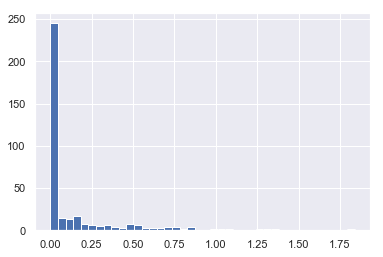

In [3]:
plt.hist(inches,40);

In [4]:
x= np.array([1,2,3,4,5])


In [5]:
x<3

array([ True,  True, False, False, False])

In [6]:
x>3

array([False, False, False,  True,  True])

In [7]:
x<=3

array([ True,  True,  True, False, False])

In [8]:
x>=3

array([False, False,  True,  True,  True])

In [9]:
x!=3

array([ True,  True, False,  True,  True])

In [10]:
x==3

array([False, False,  True, False, False])

In [11]:
(2*x ) == (x**2)

array([False,  True, False, False, False])

In [12]:
#Comparison operators will work on any size and shape of array
rng = np.random.RandomState(0)
x = rng.randint(10,size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

#### working with Boolean arrays

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [15]:
#Counting how many values less than 6?
np.count_nonzero(x<6)

8

In [16]:
#another way to get this would be
np.sum(x<6,axis=1)
#False = 0 True = 1
#This counts the numer values less than 6 in eachrow of the matrix

array([4, 2, 2])

###### to check whether any or all values are true, use np.any() or np.all()

In [17]:
#are there any values greater than 8?
np.any(x>8)

True

In [18]:
# are there any values less tha nzero?
np.any(x<0)

False

In [19]:
#are all the values less than 10
np.all(x<10)

True

In [20]:
# are all the values equal to 6
np.all(x==6)

False

###### along perticular axis

In [21]:
# are all the values in each row less than 8?
np.all(x<8, axis=1)

array([ True, False,  True])

###### Boolean operators

In [22]:
np.sum((inches>0.5) & (inches<1))

29

###### Using the above tools the following results can be calculated whem combining mkasking with aggregations


In [23]:
print("Number of days without rainfall:        ",np.sum(inches==0))
print("Number of days with rainfall:        ",np.sum(inches!=0))
print("Days with rainfall more than 0.5:        ",np.sum(inches>0.5))
print("Rainy days with < 0.1 inches:        ",np.sum((inches>0)&(inches<0.2)))

Number of days without rainfall:         215
Number of days with rainfall:         150
Days with rainfall more than 0.5:         37
Rainy days with < 0.1 inches:         75


#### Boolean Arrays as masks

In [24]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [25]:
x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

###### selecting values from the array using boolaan array as index is called masking operation

In [26]:
x[x<5]

array([0, 3, 3, 3, 2, 4])

In [27]:
#construct a mask of all rainy days
rainy = (inches>0)
#construct a mask of all summer days (june 21st is the 172nd day)
summer = (np.arange(365)-172<90) &(np.arange(365)-172>0)
print("Median precip on rainy days in 2014 (inches):     ",np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches)     ",np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):   ",np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):  ",np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):      0.19488188976377951
Median precip on summer days in 2014 (inches)      0.0
Maximum precip on summer days in 2014 (inches):    0.8503937007874016
Median precip on non-summer rainy days (inches):   0.20078740157480315
